# Accessing and using the US GHG Center Data Catalog

The US GHG Center uses a Spatio-Temporal Asset Catalog (STAC) to catalog it listing of datasets.
This tutorial teaches the basics of searching and accessing datasets using the US GHG Center STAC catalog.

## Approach
- Use the `pystac_client` library to connect to the data catalog
- List all the collections from the catalog
- Look at the items in one of the collections
- Access an asset in the item
- Use the US GHG Center TiTiler API to visualize the asset

## Libraries Used

### PySTAC Client

From the PySTAC Client Documentation:

> The STAC Python Client (`pystac_client`) is a Python package for working with STAC Catalogs and APIs that conform to the STAC and STAC API specs in a seamless way. \
> PySTAC Client builds upon PySTAC through higher-level functionality and ability to leverage STAC API search endpoints.

We will use it to interact with the data catalog.

### Requests

Requests (`requests`) is a simple HTTP library. Requests allows you to send HTTP requests extremely easily. 

We will use it to make API requests.

Here we import all the required libraries and modules.

In [66]:
import requests

from pystac_client import Client

# For displaying image in a jupyter notebook
from IPython.display import Image, display

Let's define the data catalog (STAC catalog) API URL

In [28]:
# STAC API root URL
URL = 'https://ghg.center/api/stac'

Use the `pystac_client.Client` module to connect to the catalog

In [29]:
catalog = Client.open(URL)
catalog

<Client id=stac-fastapi>

List all the datasets (collections) in the catalog

In [40]:
collections = catalog.get_collections()
collections = list(collections)

In [48]:
for collection in collections:
    # print(f">> {collection.id}: \n- {collection.description}\n")
    
    print(">> " + collection.id)
    print("- " + collection.description + "\n")

>> epa-ch4emission-yeargrid-v2express-new
- This gridded dataset represents an update to the original version 1 of the gridded GHGI from Maasakkers, et al., (2016). The annual files contain one year of emissions per source category but include a time dimension to make them suitable (COARDS-compliant) for atmospheric models. This main dataset also includes monthly source-specific methane emission scaling factors for those select sources with strong interannual variability.

>> lpjwsl-wetlandch4-monthgrid-v1
- Wetland methane emissions produced by the Lund–Potsdam–Jena Dynamic Global Vegetation Model (LPJ-DGVM) Wald Schnee und Landscaft version (LPJ-wsl). LPJ-wsl is a prognostic model used to simulate future changes in wetland emissions and independently verified with remote sensing data products. The LPJ-wsl model is regularly used in conjunction with NASA’s GEOS model to simulate the impact of wetlands and other methane sources on atmospheric methane concentrations.

>> tm54dvar-ch4flu

Pick a collection to interact with. Let's pick `eccodarwin-co2flux-monthgrid-v5`. This dataset represents the Air-Sea CO₂ flux, estimated using the ECCO (Estimating the Circulation and Climate of the Ocean) Darwin model.

Read more about the dataset in the GHG Center Web Portal: https://earth.gov/ghgcenter/data-catalog/eccodarwin-co2flux-monthgrid-v5

In [49]:
collection = catalog.get_collection("eccodarwin-co2flux-monthgrid-v5")
collection

<CollectionClient id=eccodarwin-co2flux-monthgrid-v5>

Let's look at the items within the collection, using the `CollectionClient.get_items` method

In [51]:
# get_items
items = list(collection.get_items())

In [52]:
for item in items[:10]:
    print(item)

<Item id=eccodarwin-co2flux-monthgrid-v5-202212>
<Item id=eccodarwin-co2flux-monthgrid-v5-202211>
<Item id=eccodarwin-co2flux-monthgrid-v5-202210>
<Item id=eccodarwin-co2flux-monthgrid-v5-202209>
<Item id=eccodarwin-co2flux-monthgrid-v5-202208>
<Item id=eccodarwin-co2flux-monthgrid-v5-202207>
<Item id=eccodarwin-co2flux-monthgrid-v5-202206>
<Item id=eccodarwin-co2flux-monthgrid-v5-202205>
<Item id=eccodarwin-co2flux-monthgrid-v5-202204>
<Item id=eccodarwin-co2flux-monthgrid-v5-202203>


In [55]:
item = collection.get_item(items[0].id)   # item = collection.get_item("eccodarwin-co2flux-monthgrid-v5-202212")
item

<Item id=eccodarwin-co2flux-monthgrid-v5-202212>

In [58]:
asset = item.assets["co2"].href
asset

's3://ghgc-data-store/eccodarwin-co2flux-monthgrid-v5/ECCO-Darwin_CO2_flux_202212.tif'

Visualize this asset using TiTiler

In [59]:
# Define the TiTiler url
TITILER_URL = "https://ghg.center/api/raster"

In [63]:
# TiTiler preview endpoint
cog_preview = f"/cog/preview.png?url={asset}&rescale=-0.0007,0.0002&colormap_name=bwr"

User `requests.get` to make a `GET` request for the preview

In [64]:
response = requests.get(f"{TITILER_URL}{cog_preview}") #https://ghg.center/api/raster/cog/preview.png?url=s3://ghgc-data-store/eccodarwin-co2flux-monthgrid-v5/ECCO-Darwin_CO2_flux_202212.tif&rescale=-0.0007,0.0002&colormap_name=bwr
response

<Response [200]>

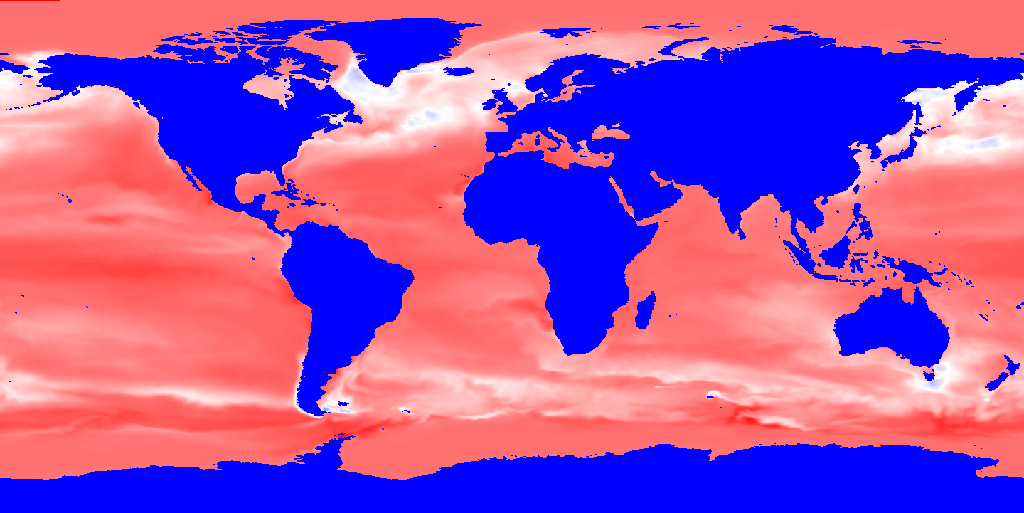

In [65]:
display(Image(response.content))

#### Searching for datasets based on the Area of Interest (AOI) and/or datetime

In [67]:
# Rought AOI for Baltimore, MD area
baltimore_aoi = {
    "type": "Polygon",
    "coordinates": [
      [
        [
          -76.7413596126004,
          39.37730408865011
        ],
        [
          -76.7413596126004,
          39.20129583511198
        ],
        [
          -76.47249934044682,
          39.20129583511198
        ],
        [
          -76.47249934044682,
          39.37730408865011
        ],
        [
          -76.7413596126004,
          39.37730408865011
        ]
      ]
    ],
}


In [93]:
# Search the catalog for the given collection, aoi and datetime
search = catalog.search(
    max_items = 100,
    # limit = 5,
    collections = "epa-ch4emission-yeargrid-v2express",
    intersects = baltimore_aoi,
    datetime = "2012-04-01/2015-12-31",
)
items = list(search.item_collection())

len(items)

100

In [95]:
items[:5]

[<Item id=oco2geos-co2-daygrid-v10r-20151231>,
 <Item id=lpjwsl-wetlandch4-daygrid-v1-20151231>,
 <Item id=oco2geos-co2-daygrid-v10r-20151230>,
 <Item id=lpjwsl-wetlandch4-daygrid-v1-20151230>,
 <Item id=oco2geos-co2-daygrid-v10r-20151229>]

## Summary

In this notebook, we used the `pystac_client` library to interact with the US GHG Center Data Catalog. We learned how to list all the datasets, list all the items in a dataset, read the metadata for the dataset/items, access the data file, visualize it and finally search the catalog for specific area of interest and datetime.